# RUN IN R, NOT PYTHON

In [ ]:
# install packages
install.packages("tidyverse")
install.packages("caret", dependencies = TRUE)
install.packages("ggplot2")
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘subselect’ is not available”
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, 

In [ ]:
# import libraries
library(tidyverse)
library(caret)
library(ggplot2)
library(glmnet)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [ ]:
# import data
health_data <- read.csv('STA 160 Health Data Final.csv')
# remove dropped columns (determined w heat map using Python)
main_health_data <- health_data[, -c(1,2,4,13, 22:25)]

In [ ]:
# hist(main_health_data$income)
# income has a left skewed disribution -> will log(income) to address this
main_health_data$income = log(main_health_data$income)

# Linear Regression

In [ ]:
# create dataframes for each y
y_stnd_death_rate <-  main_health_data[, -c(2,3,4)]
y_CHD_data <- main_health_data[, -c(1,3,4)]
y_HBP_data <- main_health_data[, -c(1,2,4)]
y_stroke_data <- main_health_data[, -c(1,2,3)]

## With All Factors

In [ ]:
## FULL MODELS
# run regression for all y's (FULL MODELS)
full_reg_chd <- lm(pct_CHD ~ ., data = y_CHD_data)
summary(full_reg_chd)

full_reg_hbp <- lm(pct_high_BP ~ ., data = y_HBP_data)
summary(full_reg_hbp)

full_reg_stroke <- lm(pct_stroke ~ ., data = y_stroke_data)
summary(full_reg_stroke)



Call:
lm(formula = pct_CHD ~ ., data = y_CHD_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27740 -0.10485 -0.01169  0.07169  0.44349 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)           12.1371404  7.4387796   1.632  0.12505   
pct_high_chol          0.0278679  0.0521733   0.534  0.60162   
pct_diabetes          -0.1466985  0.1019392  -1.439  0.17211   
pct_obesity            0.0205119  0.0235504   0.871  0.39845   
pct_phys_inactivity   -0.0602300  0.0458979  -1.312  0.21054   
pct_current_smoker     0.2434252  0.0797970   3.051  0.00864 **
income                -0.9393463  0.6046978  -1.553  0.14263   
gini                   6.2050067  4.5737023   1.357  0.19636   
pct_poverty           -0.0808597  0.0419419  -1.928  0.07440 . 
pct_unemployment      -0.0864615  0.0676958  -1.277  0.22231   
air_quality           -0.0120387  0.0393884  -0.306  0.76438   
pct_park_access       -0.0043962  0.0065875  -0.667  0.51540 


Call:
lm(formula = pct_high_BP ~ ., data = y_HBP_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31155 -0.19822  0.00917  0.42920  1.28154 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)           29.332868  28.636996   1.024   0.3231  
pct_high_chol          0.226315   0.200851   1.127   0.2788  
pct_diabetes          -0.294747   0.392434  -0.751   0.4650  
pct_obesity            0.177923   0.090662   1.962   0.0699 .
pct_phys_inactivity   -0.062718   0.176693  -0.355   0.7279  
pct_current_smoker     0.710705   0.307194   2.314   0.0364 *
income                -1.446132   2.327899  -0.621   0.5444  
gini                   3.269668  17.607337   0.186   0.8553  
pct_poverty           -0.339258   0.161463  -2.101   0.0542 .
pct_unemployment       0.010845   0.260608   0.042   0.9674  
air_quality           -0.096163   0.151633  -0.634   0.5362  
pct_park_access        0.009216   0.025360   0.363   0.7217  
urban_rural_status 


Call:
lm(formula = pct_stroke ~ ., data = y_stroke_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152778 -0.058117  0.002117  0.036948  0.173338 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)            2.1275378  3.4904031   0.610  0.55193   
pct_high_chol          0.0068949  0.0244806   0.282  0.78234   
pct_diabetes          -0.0614118  0.0478316  -1.284  0.22001   
pct_obesity            0.0081541  0.0110502   0.738  0.47276   
pct_phys_inactivity   -0.0105473  0.0215361  -0.490  0.63190   
pct_current_smoker     0.1426607  0.0374421   3.810  0.00191 **
income                -0.0351538  0.2837346  -0.124  0.90316   
gini                   0.6009172  2.1460597   0.280  0.78356   
pct_poverty           -0.0298336  0.0196798  -1.516  0.15178   
pct_unemployment      -0.0129641  0.0317640  -0.408  0.68934   
air_quality           -0.0195434  0.0184817  -1.057  0.30821   
pct_park_access       -0.0026838  0.0030910  

## Just With Risk Factors

In [ ]:
## Just w RISK FACTORS
### CHD
full_risk_model <- lm(pct_CHD ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker,
                      data = main_health_data)
summary(full_risk_model)

red_risk_model <- lm(pct_CHD ~ pct_high_chol + pct_diabetes + pct_current_smoker,
                   data = main_health_data)
summary(red_risk_model)

#### HIGH BP
full_risk_model <- lm(pct_high_BP ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker,
                    data = main_health_data)
summary(full_risk_model)

red_risk_model <- lm(pct_high_BP ~ pct_high_chol + pct_current_smoker,
                   data = main_health_data)
summary(red_risk_model)

#### STROKE
full_risk_model <- lm(pct_stroke ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker,
                    data = main_health_data)
summary(full_risk_model)
red_risk_model <- lm(pct_stroke ~ pct_high_chol + pct_current_smoker,
                   data = main_health_data)
summary(red_risk_model)


Call:
lm(formula = pct_CHD ~ pct_high_chol + pct_diabetes + pct_obesity + 
    pct_phys_inactivity + pct_current_smoker, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76764 -0.26538  0.03044  0.28481  0.99674 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -7.078830   1.146843  -6.172 1.03e-07 ***
pct_high_chol        0.338898   0.026765  12.662  < 2e-16 ***
pct_diabetes        -0.169133   0.080453  -2.102   0.0404 *  
pct_obesity          0.002554   0.015539   0.164   0.8701    
pct_phys_inactivity -0.028775   0.034805  -0.827   0.4121    
pct_current_smoker   0.223957   0.026887   8.330 3.85e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3946 on 52 degrees of freedom
Multiple R-squared:  0.9173,	Adjusted R-squared:  0.9094 
F-statistic: 115.4 on 5 and 52 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_CHD ~ pct_high_chol + pct_diabetes + pct_current_smoker, 
    data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81376 -0.27321  0.02321  0.27204  1.01840 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.25951    1.11493  -6.511 2.56e-08 ***
pct_high_chol       0.34291    0.02585  13.263  < 2e-16 ***
pct_diabetes       -0.20724    0.05571  -3.720 0.000476 ***
pct_current_smoker  0.21829    0.02578   8.469 1.74e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.39 on 54 degrees of freedom
Multiple R-squared:  0.9161,	Adjusted R-squared:  0.9115 
F-statistic: 196.6 on 3 and 54 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_high_BP ~ pct_high_chol + pct_diabetes + pct_obesity + 
    pct_phys_inactivity + pct_current_smoker, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.60509 -0.72399 -0.08455  0.87271  3.11486 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -11.48712    3.62313  -3.170  0.00255 ** 
pct_high_chol         1.05251    0.08456  12.448  < 2e-16 ***
pct_diabetes         -0.23910    0.25417  -0.941  0.35119    
pct_obesity           0.02845    0.04909   0.580  0.56469    
pct_phys_inactivity  -0.04893    0.10996  -0.445  0.65815    
pct_current_smoker    0.50081    0.08494   5.896 2.81e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.247 on 52 degrees of freedom
Multiple R-squared:  0.891,	Adjusted R-squared:  0.8806 
F-statistic: 85.05 on 5 and 52 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_high_BP ~ pct_high_chol + pct_current_smoker, 
    data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2695 -0.6570 -0.1437  0.8474  3.3276 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -14.95427    2.31532  -6.459 2.89e-08 ***
pct_high_chol        1.10730    0.06772  16.350  < 2e-16 ***
pct_current_smoker   0.45417    0.07393   6.143 9.44e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.233 on 55 degrees of freedom
Multiple R-squared:  0.8872,	Adjusted R-squared:  0.8831 
F-statistic: 216.2 on 2 and 55 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_stroke ~ pct_high_chol + pct_diabetes + pct_obesity + 
    pct_phys_inactivity + pct_current_smoker, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35278 -0.11019 -0.00764  0.10041  0.49889 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -2.870510   0.497236  -5.773 4.39e-07 ***
pct_high_chol        0.140750   0.011604  12.129  < 2e-16 ***
pct_diabetes        -0.045613   0.034882  -1.308    0.197    
pct_obesity          0.002520   0.006737   0.374    0.710    
pct_phys_inactivity -0.004584   0.015090  -0.304    0.763    
pct_current_smoker   0.112199   0.011657   9.625 3.83e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1711 on 52 degrees of freedom
Multiple R-squared:  0.9142,	Adjusted R-squared:  0.906 
F-statistic: 110.8 on 5 and 52 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_stroke ~ pct_high_chol + pct_current_smoker, 
    data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32252 -0.09895 -0.00132  0.09887  0.53719 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.554288   0.322313  -11.03 1.50e-15 ***
pct_high_chol       0.152106   0.009428   16.13  < 2e-16 ***
pct_current_smoker  0.103172   0.010292   10.03 5.11e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1717 on 55 degrees of freedom
Multiple R-squared:  0.9086,	Adjusted R-squared:  0.9053 
F-statistic: 273.4 on 2 and 55 DF,  p-value: < 2.2e-16


## Just With Social, Economic, & Environmental Factors

In [ ]:
## Just w SOCIAL, ECONOMIC, & ENVIRONMENTAL FACTORS
### CHD
full_income_model <- lm(pct_CHD ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status,
                      data = main_health_data)
summary(full_income_model)

#### HIGH BP
full_income_model <- lm(pct_high_BP ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status,
                    data = main_health_data)
summary(full_income_model)

#### STROKE
full_income_model <- lm(pct_stroke ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status,
                    data = main_health_data)
summary(full_income_model)



Call:
lm(formula = pct_CHD ~ income + gini + pct_poverty + pct_unemployment + 
    air_quality + pct_park_access + urban_rural_status, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92056 -0.38168 -0.05756  0.19324  1.44807 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        53.8516445  8.1845876   6.580 2.73e-08 ***
income             -4.4341685  0.6883080  -6.442 4.48e-08 ***
gini                8.7554455  3.1760429   2.757 0.008128 ** 
pct_poverty        -0.1609410  0.0409804  -3.927 0.000264 ***
pct_unemployment   -0.0644687  0.0518286  -1.244 0.219343    
air_quality        -0.0359162  0.0431949  -0.831 0.409649    
pct_park_access    -0.0007627  0.0050244  -0.152 0.879963    
urban_rural_status  0.4043828  0.1468016   2.755 0.008174 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6157 on 50 degrees of freedom
Multiple R-squared:  0.8065,	Adjusted


Call:
lm(formula = pct_CHD ~ income + gini + pct_poverty + urban_rural_status, 
    data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0240 -0.3952 -0.0713  0.2235  1.5856 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        51.72682    8.08100   6.401 4.14e-08 ***
income             -4.35076    0.68530  -6.349 5.02e-08 ***
gini               10.19727    2.79593   3.647 0.000606 ***
pct_poverty        -0.18776    0.03748  -5.009 6.43e-06 ***
urban_rural_status  0.47896    0.12232   3.915 0.000260 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6157 on 53 degrees of freedom
Multiple R-squared:  0.7949,	Adjusted R-squared:  0.7794 
F-statistic: 51.34 on 4 and 53 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_high_BP ~ income + gini + pct_poverty + pct_unemployment + 
    air_quality + pct_park_access + urban_rural_status, data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6732 -0.9444 -0.0369  1.0669  4.0592 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        170.484846  23.442118   7.273 2.25e-09 ***
income             -13.026112   1.971437  -6.607 2.47e-08 ***
gini                25.251390   9.096753   2.776  0.00773 ** 
pct_poverty         -0.532790   0.117375  -4.539 3.57e-05 ***
pct_unemployment    -0.246337   0.148446  -1.659  0.10329    
air_quality          0.034437   0.123718   0.278  0.78189    
pct_park_access      0.001616   0.014391   0.112  0.91105    
urban_rural_status   1.248070   0.420466   2.968  0.00459 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.763 on 50 degrees of freedom
Multiple R-squared:  0.7903,	Adjusted R-squa


Call:
lm(formula = pct_high_BP ~ income + gini + pct_poverty + urban_rural_status, 
    data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9175 -0.8715 -0.2138  1.0147  4.3107 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        166.3622    23.1576   7.184 2.28e-09 ***
income             -12.7198     1.9638  -6.477 3.13e-08 ***
gini                26.7794     8.0122   3.342  0.00153 ** 
pct_poverty         -0.5841     0.1074  -5.438 1.40e-06 ***
urban_rural_status   1.1931     0.3505   3.404  0.00127 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.764 on 53 degrees of freedom
Multiple R-squared:  0.7775,	Adjusted R-squared:  0.7607 
F-statistic:  46.3 on 4 and 53 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_stroke ~ income + gini + pct_poverty + pct_unemployment + 
    air_quality + pct_park_access + urban_rural_status, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50744 -0.11850  0.00518  0.11410  0.59347 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25.047134   3.497173   7.162 3.35e-09 ***
income             -1.996841   0.294106  -6.790 1.28e-08 ***
gini                3.130693   1.357084   2.307 0.025239 *  
pct_poverty        -0.063223   0.017510  -3.611 0.000707 ***
pct_unemployment   -0.010647   0.022146  -0.481 0.632763    
air_quality        -0.012299   0.018457  -0.666 0.508248    
pct_park_access    -0.001031   0.002147  -0.480 0.633256    
urban_rural_status  0.123949   0.062726   1.976 0.053684 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2631 on 50 degrees of freedom
Multiple R-squared:  0.8049,	Adjusted R-squ


Call:
lm(formula = pct_stroke ~ income + gini + pct_poverty, data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5376 -0.1493 -0.0315  0.1088  0.7506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.81968    2.52107  12.621  < 2e-16 ***
income      -2.58550    0.21907 -11.802  < 2e-16 ***
gini         3.77520    1.24581   3.030  0.00375 ** 
pct_poverty -0.08537    0.01571  -5.436 1.35e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2762 on 54 degrees of freedom
Multiple R-squared:  0.7678,	Adjusted R-squared:  0.7549 
F-statistic: 59.53 on 3 and 54 DF,  p-value: < 2.2e-16


## Just With Health Care Factors

In [ ]:
## Just w HEALTH CARE FACTORS
### CHD
full_health_model <- lm(pct_CHD ~ num_hospitals	+ pop_per_primary_dr + pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + pct_no_health_insur,
                      data = main_health_data)
summary(full_health_model)

#### HIGH BP
full_health_model <- lm(pct_high_BP ~ num_hospitals	+ pop_per_primary_dr + pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + pct_no_health_insur,
                    data = main_health_data)
summary(full_health_model)

#### STROKE
full_health_model <- lm(pct_stroke ~ num_hospitals	+ pop_per_primary_dr + pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + pct_no_health_insur,
                    data = main_health_data)
summary(full_health_model)



Call:
lm(formula = pct_CHD ~ num_hospitals + pop_per_primary_dr + pop_per_cvd_dr + 
    pop_per_neuro_dr + pop_per_neuro_surg_dr + pct_no_health_insur, 
    data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01696 -0.29650 -0.06547  0.23569  1.37004 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.5630403  0.3695942  12.346 2.23e-12 ***
num_hospitals         -0.0161069  0.0083163  -1.937   0.0637 .  
pop_per_primary_dr    -0.1690984  0.3496077  -0.484   0.6327    
pop_per_cvd_dr         0.0052330  0.0092856   0.564   0.5779    
pop_per_neuro_dr       0.0094780  0.0068386   1.386   0.1775    
pop_per_neuro_surg_dr -0.0003844  0.0007588  -0.507   0.6167    
pct_no_health_insur    0.1196292  0.0593958   2.014   0.0545 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5379 on 26 degrees of freedom
  (25 observations deleted due to missingness)
Multip


Call:
lm(formula = pct_high_BP ~ num_hospitals + pop_per_primary_dr + 
    pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + 
    pct_no_health_insur, data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1098 -1.0717 -0.0248  1.1987  2.8216 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           26.2138327  1.2355778  21.216   <2e-16 ***
num_hospitals         -0.0234867  0.0278019  -0.845    0.406    
pop_per_primary_dr    -0.1493859  1.1687616  -0.128    0.899    
pop_per_cvd_dr         0.0148503  0.0310424   0.478    0.636    
pop_per_neuro_dr       0.0165881  0.0228619   0.726    0.475    
pop_per_neuro_surg_dr  0.0004482  0.0025367   0.177    0.861    
pct_no_health_insur    0.2929643  0.1985639   1.475    0.152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.798 on 26 degrees of freedom
  (25 observations deleted due to missingness)
Multiple R-sq


Call:
lm(formula = pct_stroke ~ num_hospitals + pop_per_primary_dr + 
    pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + 
    pct_no_health_insur, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48247 -0.12867 -0.00969  0.11618  0.58449 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.339e+00  1.568e-01  14.915 2.95e-14 ***
num_hospitals         -3.660e-03  3.529e-03  -1.037   0.3092    
pop_per_primary_dr     8.316e-04  1.483e-01   0.006   0.9956    
pop_per_cvd_dr         2.720e-03  3.940e-03   0.690   0.4961    
pop_per_neuro_dr       4.281e-03  2.902e-03   1.475   0.1521    
pop_per_neuro_surg_dr  6.792e-05  3.220e-04   0.211   0.8346    
pct_no_health_insur    5.646e-02  2.520e-02   2.240   0.0338 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2282 on 26 degrees of freedom
  (25 observations deleted due to missingness)
Mul


Call:
lm(formula = pct_stroke ~ pct_no_health_insur, data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8350 -0.4164 -0.1577  0.3520  1.5455 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.90650    0.29998   9.689 1.42e-13 ***
pct_no_health_insur  0.05194    0.03808   1.364    0.178    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5537 on 56 degrees of freedom
Multiple R-squared:  0.03215,	Adjusted R-squared:  0.01487 
F-statistic:  1.86 on 1 and 56 DF,  p-value: 0.1781


## Social, Economic, & Environmental Data and Health Data (Together)

In [ ]:
### CHD
full_income_health_model <- lm(pct_CHD ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status +
                              num_hospitals	+ pop_per_primary_dr + pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + pct_no_health_insur,
                              data = main_health_data)
summary(full_income_health_model)

#### HIGH BP
full_income_health_model <- lm(pct_high_BP ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status +
                              num_hospitals+ pop_per_primary_dr + pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + pct_no_health_insur,
                              data = main_health_data)
summary(full_income_health_model)

#### STROKE
full_income_health_model <- lm(pct_stroke ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status +
                              num_hospitals	+ pop_per_primary_dr + pop_per_cvd_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr + pct_no_health_insur,
                              data = main_health_data)
summary(full_income_health_model)

# Lasso Regresion

In [ ]:
# extract data from main dataset for lasso regression
df = na.omit(main_health_data)
N = nrow(df)
all_x_var = data.matrix(df[, -c(1, 2, 3, 4)])
risk_x_var = data.matrix(df[, c("pct_high_chol", "pct_diabetes", "pct_obesity", "pct_phys_inactivity", "pct_current_smoker")])
income_x_var = data.matrix(df[, c("income", "gini", "pct_poverty", "pct_unemployment", "air_quality", "pct_park_access", "urban_rural_status")])
health_x_var = data.matrix(df[, c("num_hospitals", "pop_per_primary_dr", "pop_per_cvd_dr", "pop_per_neuro_dr", "pop_per_neuro_surg_dr", "pct_no_health_insur")])
income_health_x_var = data.matrix(df[, c("income", "gini", "pct_poverty", "pct_unemployment", "air_quality", "pct_park_access", "urban_rural_status", "num_hospitals", "pop_per_primary_dr", "pop_per_cvd_dr", "pop_per_neuro_dr", "pop_per_neuro_surg_dr", "pct_no_health_insur")])
CHD_y_var = df[, "pct_CHD"]
BP_y_var = df[, "pct_high_BP"]
stroke_y_var = df[, "pct_stroke"]
lambda_seq = 10^seq(2, -2, by = -.1)

In [ ]:
# set up lasso regression
set.seed(100)
train = sample(1:N, N/2)
x_test = (-train)
CHD_y_test = CHD_y_var[x_test]
BP_y_test = BP_y_var[x_test]
stroke_y_test = stroke_y_var[x_test]

In [ ]:
# coronary heart disease
all_CHD_output = cv.glmnet(all_x_var[train,], CHD_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
all_CHD_lasso = glmnet(all_x_var[train,], CHD_y_var[train], alpha = 1, lambda = all_CHD_output$lambda.min)
coef(all_CHD_lasso)

19 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)            2.877871169
pct_high_chol          0.079875715
pct_diabetes           .          
pct_obesity            .          
pct_phys_inactivity    .          
pct_current_smoker     .          
income                 .          
gini                   .          
pct_poverty            .          
pct_unemployment       .          
air_quality            .          
pct_park_access       -0.012770298
urban_rural_status     0.308994528
num_hospitals          .          
pop_per_primary_dr     .          
pop_per_cvd_dr         .          
pop_per_neuro_dr       0.001666054
pop_per_neuro_surg_dr  .          
pct_no_health_insur    .          

In [ ]:
risk_CHD_output = cv.glmnet(risk_x_var[train,], CHD_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
risk_CHD_lasso = glmnet(risk_x_var[train,], CHD_y_var[train], alpha = 1, lambda = risk_CHD_output$lambda.min)
coef(risk_CHD_lasso)

6 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)         -0.847400361
pct_high_chol        0.177082045
pct_diabetes        -0.351393112
pct_obesity          0.039035397
pct_phys_inactivity -0.001772555
pct_current_smoker   0.189028630

In [ ]:
income_CHD_output = cv.glmnet(income_x_var[train,], CHD_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
income_CHD_lasso = glmnet(income_x_var[train,], CHD_y_var[train], alpha = 1, lambda = income_CHD_output$lambda.min)
coef(income_CHD_lasso)

8 x 1 sparse Matrix of class "dgCMatrix"
                            s0
(Intercept)         7.21048244
income             -0.12825672
gini                .         
pct_poverty         .         
pct_unemployment    .         
air_quality         .         
pct_park_access    -0.01425359
urban_rural_status  0.35123240

In [ ]:
health_CHD_output = cv.glmnet(health_x_var[train,], CHD_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
health_CHD_lasso = glmnet(health_x_var[train,], CHD_y_var[train], alpha = 1, lambda = health_CHD_output$lambda.min)
coef(health_CHD_lasso)

7 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)            5.2452834470
num_hospitals         -0.0005866721
pop_per_primary_dr     .           
pop_per_cvd_dr         0.0072289572
pop_per_neuro_dr       0.0040236359
pop_per_neuro_surg_dr  .           
pct_no_health_insur    .           

In [ ]:
income_health_CHD_output = cv.glmnet(income_health_x_var[train,], CHD_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
income_health_CHD_lasso = glmnet(income_health_x_var[train,], CHD_y_var[train], alpha = 1, lambda = income_health_CHD_output$lambda.min)
coef(income_health_CHD_lasso)

14 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)            6.353749154
income                 .          
gini                  -1.184399754
pct_poverty           -0.003323457
pct_unemployment       .          
air_quality            .          
pct_park_access       -0.015460044
urban_rural_status     0.399027745
num_hospitals          .          
pop_per_primary_dr     0.025892698
pop_per_cvd_dr         .          
pop_per_neuro_dr       0.002324873
pop_per_neuro_surg_dr -0.001897621
pct_no_health_insur    .          

In [ ]:
# blood pressure
all_BP_output = cv.glmnet(all_x_var[train,], BP_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
all_BP_lasso = glmnet(all_x_var[train,], BP_y_var[train], alpha = 1, lambda = all_BP_output$lambda.min)
coef(all_BP_lasso)

19 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)           13.95929396
pct_high_chol          0.51212462
pct_diabetes           .         
pct_obesity            .         
pct_phys_inactivity    .         
pct_current_smoker     .         
income                 .         
gini                   .         
pct_poverty            .         
pct_unemployment       .         
air_quality            .         
pct_park_access       -0.06059281
urban_rural_status     0.54857567
num_hospitals          .         
pop_per_primary_dr     .         
pop_per_cvd_dr         .         
pop_per_neuro_dr       .         
pop_per_neuro_surg_dr  .         
pct_no_health_insur    .         

In [ ]:
risk_BP_output = cv.glmnet(risk_x_var[train,], BP_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
risk_BP_lasso = glmnet(risk_x_var[train,], BP_y_var[train], alpha = 1, lambda = risk_BP_output$lambda.min)
coef(risk_BP_lasso)

6 x 1 sparse Matrix of class "dgCMatrix"
                            s0
(Intercept)         -0.3486455
pct_high_chol        0.7660553
pct_diabetes        -0.6004426
pct_obesity          0.1177603
pct_phys_inactivity  .        
pct_current_smoker   0.3723790

In [ ]:
income_BP_output = cv.glmnet(income_x_var[train,], BP_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
income_BP_lasso = glmnet(income_x_var[train,], BP_y_var[train], alpha = 1, lambda = income_BP_output$lambda.min)
coef(income_BP_lasso)

8 x 1 sparse Matrix of class "dgCMatrix"
                            s0
(Intercept)        31.96591906
income              .         
gini                .         
pct_poverty         .         
pct_unemployment    .         
air_quality         .         
pct_park_access    -0.06952037
urban_rural_status  0.78649443

In [ ]:
health_BP_output = cv.glmnet(health_x_var[train,], BP_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
health_BP_lasso = glmnet(health_x_var[train,], BP_y_var[train], alpha = 1, lambda = health_BP_output$lambda.min)
coef(health_BP_lasso)

7 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)           29.025
num_hospitals          0.000
pop_per_primary_dr     .    
pop_per_cvd_dr         .    
pop_per_neuro_dr       .    
pop_per_neuro_surg_dr  .    
pct_no_health_insur    .    

In [ ]:
income_health_BP_output = cv.glmnet(income_health_x_var[train,], BP_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
income_health_BP_lasso = glmnet(income_health_x_var[train,], BP_y_var[train], alpha = 1, lambda = income_health_BP_output$lambda.min)
coef(income_health_BP_lasso)

14 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)           31.64672660
income                 .         
gini                   .         
pct_poverty            .         
pct_unemployment       .         
air_quality            .         
pct_park_access       -0.06011248
urban_rural_status     0.65004636
num_hospitals          .         
pop_per_primary_dr     .         
pop_per_cvd_dr         .         
pop_per_neuro_dr       .         
pop_per_neuro_surg_dr  .         
pct_no_health_insur    .         

In [ ]:
# stroke
all_stroke_output = cv.glmnet(all_x_var[train,], stroke_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
all_stroke_lasso = glmnet(all_x_var[train,], stroke_y_var[train], alpha = 1, lambda = all_stroke_output$lambda.min)
coef(all_stroke_lasso)

19 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)            0.736225807
pct_high_chol          0.084069012
pct_diabetes           .          
pct_obesity            0.009545545
pct_phys_inactivity    .          
pct_current_smoker     .          
income                 .          
gini                  -2.375556561
pct_poverty            .          
pct_unemployment       .          
air_quality            .          
pct_park_access       -0.002790856
urban_rural_status     0.102033033
num_hospitals          .          
pop_per_primary_dr     0.096417898
pop_per_cvd_dr         .          
pop_per_neuro_dr       .          
pop_per_neuro_surg_dr  .          
pct_no_health_insur    .          

In [ ]:
risk_stroke_output = cv.glmnet(risk_x_var[train,], stroke_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
risk_stroke_lasso = glmnet(risk_x_var[train,], stroke_y_var[train], alpha = 1, lambda = risk_stroke_output$lambda.min)
coef(risk_stroke_lasso)

6 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)         -1.405374844
pct_high_chol        0.106723134
pct_diabetes        -0.094135785
pct_obesity          0.022412378
pct_phys_inactivity  0.006260933
pct_current_smoker   0.064407296

In [ ]:
income_stroke_output = cv.glmnet(income_x_var[train,], stroke_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
income_stroke_lasso = glmnet(income_x_var[train,], stroke_y_var[train], alpha = 1, lambda = income_stroke_output$lambda.min)
coef(income_stroke_lasso)

8 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)         9.524815338
income             -0.533016751
gini               -0.702793903
pct_poverty        -0.016881926
pct_unemployment    0.026809272
air_quality         0.001000337
pct_park_access    -0.004910225
urban_rural_status  0.115841984

In [ ]:
health_stroke_output = cv.glmnet(health_x_var[train,], stroke_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
health_stroke_lasso = glmnet(health_x_var[train,], stroke_y_var[train], alpha = 1, lambda = health_stroke_output$lambda.min)
coef(health_stroke_lasso)

7 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)           2.8379064077
num_hospitals         .           
pop_per_primary_dr    0.1184388498
pop_per_cvd_dr        0.0001042871
pop_per_neuro_dr      .           
pop_per_neuro_surg_dr .           
pct_no_health_insur   .           

In [ ]:
income_health_stroke_output = cv.glmnet(income_health_x_var[train,], stroke_y_var[train], alpha = 1, lambda = lambda_seq, nfolds = 5)
income_health_stroke_lasso = glmnet(income_health_x_var[train,], stroke_y_var[train], alpha = 1, lambda = income_health_stroke_output$lambda.min)
coef(income_health_stroke_lasso)

14 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)            3.393544700
income                -0.002045853
gini                  -1.314790840
pct_poverty            .          
pct_unemployment       .          
air_quality            .          
pct_park_access       -0.005643205
urban_rural_status     0.165982425
num_hospitals          0.003218671
pop_per_primary_dr     0.142619419
pop_per_cvd_dr         .          
pop_per_neuro_dr       .          
pop_per_neuro_surg_dr  .          
pct_no_health_insur    .          

## Lasso Regression Models

In [ ]:
# CHD
lasso_full_CHD <- lm(pct_CHD ~ pct_high_chol + pct_park_access + urban_rural_status + pop_per_neuro_surg_dr, data = main_health_data)
summary(lasso_full_CHD)

lasso_risk_CHD <- lm(pct_CHD ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker,
                      data = main_health_data)
summary(lasso_risk_CHD)

lasso_income_CHD <- lm(pct_CHD ~ income + pct_park_access + urban_rural_status,
                      data = main_health_data)
summary(lasso_income_CHD)

lasso_health_CHD <- lm(pct_CHD ~ num_hospitals	+ pop_per_cvd_dr + pop_per_neuro_dr,
                    data = main_health_data)
summary(lasso_health_CHD)

lasso_income_health_CHD <- lm(pct_CHD ~ gini + pct_poverty + pct_park_access + urban_rural_status + pop_per_primary_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr,
                    data = main_health_data)
summary(lasso_income_health_CHD)



Call:
lm(formula = pct_CHD ~ pct_high_chol + pct_park_access + urban_rural_status + 
    pop_per_neuro_surg_dr, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58587 -0.24341 -0.02971  0.16490  0.78631 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)            2.0294985  1.9010034   1.068  0.29482   
pct_high_chol          0.1226569  0.0505564   2.426  0.02195 * 
pct_park_access       -0.0195802  0.0054106  -3.619  0.00116 **
urban_rural_status     0.3105722  0.0921982   3.369  0.00221 **
pop_per_neuro_surg_dr -0.0005637  0.0004915  -1.147  0.26117   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3481 on 28 degrees of freedom
  (25 observations deleted due to missingness)
Multiple R-squared:  0.7702,	Adjusted R-squared:  0.7374 
F-statistic: 23.47 on 4 and 28 DF,  p-value: 1.346e-08



Call:
lm(formula = pct_CHD ~ pct_high_chol + pct_diabetes + pct_obesity + 
    pct_phys_inactivity + pct_current_smoker, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76764 -0.26538  0.03044  0.28481  0.99674 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -7.078830   1.146843  -6.172 1.03e-07 ***
pct_high_chol        0.338898   0.026765  12.662  < 2e-16 ***
pct_diabetes        -0.169133   0.080453  -2.102   0.0404 *  
pct_obesity          0.002554   0.015539   0.164   0.8701    
pct_phys_inactivity -0.028775   0.034805  -0.827   0.4121    
pct_current_smoker   0.223957   0.026887   8.330 3.85e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3946 on 52 degrees of freedom
Multiple R-squared:  0.9173,	Adjusted R-squared:  0.9094 
F-statistic: 115.4 on 5 and 52 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_CHD ~ income + pct_park_access + urban_rural_status, 
    data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39514 -0.58037 -0.05754  0.47129  1.89614 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        23.479420   6.376309   3.682 0.000536 ***
income             -1.749059   0.548311  -3.190 0.002371 ** 
pct_park_access     0.006670   0.005673   1.176 0.244852    
urban_rural_status  0.719973   0.141146   5.101 4.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7555 on 54 degrees of freedom
Multiple R-squared:  0.6853,	Adjusted R-squared:  0.6679 
F-statistic: 39.21 on 3 and 54 DF,  p-value: 1.371e-13



Call:
lm(formula = pct_CHD ~ num_hospitals + pop_per_cvd_dr + pop_per_neuro_dr, 
    data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3401 -0.4861 -0.1670  0.2761  2.3123 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.485706   0.317831  17.260   <2e-16 ***
num_hospitals    -0.022050   0.011993  -1.839   0.0736 .  
pop_per_cvd_dr    0.011092   0.010615   1.045   0.3025    
pop_per_neuro_dr  0.005165   0.004907   1.052   0.2991    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8743 on 39 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.2452,	Adjusted R-squared:  0.1871 
F-statistic: 4.223 on 3 and 39 DF,  p-value: 0.01117



Call:
lm(formula = pct_CHD ~ gini + pct_poverty + pct_park_access + 
    urban_rural_status + pop_per_primary_dr + pop_per_neuro_dr + 
    pop_per_neuro_surg_dr, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63448 -0.21419 -0.03339  0.18358  0.94718 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)            5.5150362  1.7877343   3.085  0.00492 **
gini                   2.4869307  4.1290816   0.602  0.55240   
pct_poverty           -0.0290143  0.0297316  -0.976  0.33848   
pct_park_access       -0.0239298  0.0081319  -2.943  0.00693 **
urban_rural_status     0.3523366  0.1160384   3.036  0.00553 **
pop_per_primary_dr     0.1496483  0.2659343   0.563  0.57863   
pop_per_neuro_dr       0.0012958  0.0048459   0.267  0.79135   
pop_per_neuro_surg_dr -0.0005603  0.0005978  -0.937  0.35762   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3928 on 25 degrees of 

In [ ]:
# High BP
lasso_full_HBP <- lm(pct_high_BP ~ pct_high_chol + pct_obesity + pct_park_access + urban_rural_status, data = main_health_data)
summary(lasso_full_HBP)

lasso_risk_HBP <- lm(pct_high_BP ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_current_smoker,
                      data = main_health_data)
summary(lasso_risk_HBP)

lasso_income_HBP <- lm(pct_high_BP ~ pct_park_access + urban_rural_status,
                      data = main_health_data)
summary(lasso_income_HBP)

lasso_health_HBP <- lm(pct_high_BP ~ num_hospitals,
                    data = main_health_data)
summary(lasso_health_HBP)

lasso_income_health_HBP <- lm(pct_high_BP ~ pct_park_access + urban_rural_status,
                    data = main_health_data)
summary(lasso_income_health_HBP)


Call:
lm(formula = pct_high_BP ~ pct_high_chol + pct_obesity + pct_park_access + 
    urban_rural_status, data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6422 -0.7211  0.1521  0.5887  4.2119 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -11.269154   3.415280  -3.300  0.00174 ** 
pct_high_chol        1.019861   0.088297  11.550 4.30e-16 ***
pct_obesity          0.068206   0.032577   2.094  0.04109 *  
pct_park_access      0.001230   0.009901   0.124  0.90162    
urban_rural_status   1.199614   0.236239   5.078 5.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.269 on 53 degrees of freedom
Multiple R-squared:  0.8849,	Adjusted R-squared:  0.8762 
F-statistic: 101.9 on 4 and 53 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_high_BP ~ pct_high_chol + pct_diabetes + pct_obesity + 
    pct_current_smoker, data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4473 -0.7436 -0.1336  0.8477  3.1539 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -11.76723    3.54094  -3.323  0.00162 ** 
pct_high_chol        1.05714    0.08327  12.695  < 2e-16 ***
pct_diabetes        -0.28059    0.23466  -1.196  0.23713    
pct_obesity          0.01771    0.04242   0.417  0.67805    
pct_current_smoker   0.49253    0.08225   5.988 1.89e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 53 degrees of freedom
Multiple R-squared:  0.8906,	Adjusted R-squared:  0.8824 
F-statistic: 107.9 on 4 and 53 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_high_BP ~ pct_park_access + urban_rural_status, 
    data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9222 -1.4000 -0.4813  1.5357  6.5172 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        22.403773   1.814289  12.349  < 2e-16 ***
pct_park_access     0.009862   0.016940   0.582    0.563    
urban_rural_status  2.760523   0.328309   8.408 1.89e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.342 on 55 degrees of freedom
Multiple R-squared:  0.5932,	Adjusted R-squared:  0.5784 
F-statistic: 40.11 on 2 and 55 DF,  p-value: 1.806e-11



Call:
lm(formula = pct_high_BP ~ num_hospitals, data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4878 -2.1592 -0.7513  2.3347  9.2073 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   31.79756    0.51520  61.719   <2e-16 ***
num_hospitals -0.10487    0.04378  -2.395     0.02 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.466 on 56 degrees of freedom
Multiple R-squared:  0.09294,	Adjusted R-squared:  0.07674 
F-statistic: 5.738 on 1 and 56 DF,  p-value: 0.01997



Call:
lm(formula = pct_high_BP ~ pct_park_access + urban_rural_status, 
    data = main_health_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9222 -1.4000 -0.4813  1.5357  6.5172 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        22.403773   1.814289  12.349  < 2e-16 ***
pct_park_access     0.009862   0.016940   0.582    0.563    
urban_rural_status  2.760523   0.328309   8.408 1.89e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.342 on 55 degrees of freedom
Multiple R-squared:  0.5932,	Adjusted R-squared:  0.5784 
F-statistic: 40.11 on 2 and 55 DF,  p-value: 1.806e-11


In [ ]:
# Stroke
lasso_full_stroke <- lm(pct_stroke ~ pct_high_chol + pct_obesity + gini
                         + pct_park_access + urban_rural_status + pop_per_primary_dr,
                         data = main_health_data)
summary(lasso_full_stroke)

lasso_risk_stroke <- lm(pct_stroke ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker,
                      data = main_health_data)
summary(lasso_risk_stroke)

lasso_income_stroke <- lm(pct_stroke ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status,
                      data = main_health_data)
summary(lasso_income_stroke)

lasso_health_stroke <- lm(pct_stroke ~ pop_per_primary_dr + pop_per_cvd_dr,
                    data = main_health_data)
summary(lasso_health_stroke)

lasso_income_health_stroke <- lm(pct_stroke ~ income + gini + pct_park_access + urban_rural_status + num_hospitals + pop_per_primary_dr,
                    data = main_health_data)
summary(lasso_income_health_stroke)


Call:
lm(formula = pct_stroke ~ pct_high_chol + pct_obesity + gini + 
    pct_park_access + urban_rural_status + pop_per_primary_dr, 
    data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32854 -0.09195 -0.00931  0.08025  0.58831 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.118e+00  7.019e-01  -4.442 5.09e-05 ***
pct_high_chol       1.503e-01  1.510e-02   9.949 2.38e-13 ***
pct_obesity         1.350e-02  5.259e-03   2.568 0.013340 *  
gini               -1.080e-01  1.126e+00  -0.096 0.923925    
pct_park_access    -9.069e-05  1.811e-03  -0.050 0.960258    
urban_rural_status  1.676e-01  4.036e-02   4.153 0.000131 ***
pop_per_primary_dr  9.388e-02  2.783e-02   3.374 0.001455 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2027 on 49 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8826,	Adjusted R-squared:  


Call:
lm(formula = pct_stroke ~ pct_high_chol + pct_diabetes + pct_obesity + 
    pct_phys_inactivity + pct_current_smoker, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35278 -0.11019 -0.00764  0.10041  0.49889 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -2.870510   0.497236  -5.773 4.39e-07 ***
pct_high_chol        0.140750   0.011604  12.129  < 2e-16 ***
pct_diabetes        -0.045613   0.034882  -1.308    0.197    
pct_obesity          0.002520   0.006737   0.374    0.710    
pct_phys_inactivity -0.004584   0.015090  -0.304    0.763    
pct_current_smoker   0.112199   0.011657   9.625 3.83e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1711 on 52 degrees of freedom
Multiple R-squared:  0.9142,	Adjusted R-squared:  0.906 
F-statistic: 110.8 on 5 and 52 DF,  p-value: < 2.2e-16



Call:
lm(formula = pct_stroke ~ income + gini + pct_poverty + pct_unemployment + 
    air_quality + pct_park_access + urban_rural_status, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50744 -0.11850  0.00518  0.11410  0.59347 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25.047134   3.497173   7.162 3.35e-09 ***
income             -1.996841   0.294106  -6.790 1.28e-08 ***
gini                3.130693   1.357084   2.307 0.025239 *  
pct_poverty        -0.063223   0.017510  -3.611 0.000707 ***
pct_unemployment   -0.010647   0.022146  -0.481 0.632763    
air_quality        -0.012299   0.018457  -0.666 0.508248    
pct_park_access    -0.001031   0.002147  -0.480 0.633256    
urban_rural_status  0.123949   0.062726   1.976 0.053684 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2631 on 50 degrees of freedom
Multiple R-squared:  0.8049,	Adjusted R-squ


Call:
lm(formula = pct_stroke ~ pop_per_primary_dr + pop_per_cvd_dr, 
    data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86875 -0.23903  0.00292  0.14217  1.08074 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.751747   0.133291  20.645   <2e-16 ***
pop_per_primary_dr 0.108469   0.067453   1.608    0.115    
pop_per_cvd_dr     0.006232   0.003836   1.625    0.112    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3869 on 43 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.1816,	Adjusted R-squared:  0.1436 
F-statistic: 4.772 on 2 and 43 DF,  p-value: 0.01344



Call:
lm(formula = pct_stroke ~ income + gini + pct_park_access + urban_rural_status + 
    num_hospitals + pop_per_primary_dr, data = main_health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54914 -0.18377  0.00605  0.15307  0.78937 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        11.362343   3.035818   3.743 0.000478 ***
income             -0.911646   0.247001  -3.691 0.000561 ***
gini                2.815301   1.622010   1.736 0.088905 .  
pct_park_access     0.000969   0.002586   0.375 0.709501    
urban_rural_status  0.254207   0.070393   3.611 0.000716 ***
num_hospitals       0.001731   0.004890   0.354 0.724821    
pop_per_primary_dr  0.046809   0.043766   1.070 0.290074    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3055 on 49 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7333,	Adjusted R-squared:  0.7006 
F-statisti

# Cross-Validation

## LOOCV

In [ ]:
# LOOCV
train_control <- trainControl(method = "LOOCV")

### CHD

In [ ]:
### CHD
full_model <- train(pct_CHD ~ ., data = na.omit(y_CHD_data),
               method = "lm", trControl = train_control)
print(full_model)

# lasso reg model from full model
lasso_reg_model <- train(pct_CHD ~ pct_high_chol + pct_park_access + urban_rural_status + pop_per_neuro_surg_dr, data = na.omit(y_CHD_data),
                   method = "lm", trControl = train_control)
print(lasso_reg_model)

# basic reduced linear model w only Risk Factors (RF)
red_reg_model_RF <- train(pct_CHD ~ pct_high_chol + pct_diabetes + pct_current_smoker, data = na.omit(y_CHD_data),
                         method = "lm", trControl = train_control)
print(red_reg_model_RF)

Linear Regression 

33 samples
18 predictors

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.630823  0.4945345  0.3736128

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 4 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.3832012  0.679394  0.3015895

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 3 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3509627  0.7269078  0.2919337

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso models for each category of each X separately
lasso_risk_CHD <- train(pct_CHD ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker, data = na.omit(y_CHD_data),
                   method = "lm", trControl = train_control)
print(lasso_risk_CHD)

lasso_income_CHD <- train(pct_CHD ~ income + pct_park_access + urban_rural_status, data = na.omit(y_CHD_data),
                      method = "lm", trControl = train_control)
print(lasso_income_CHD)

lasso_health_CHD <- train(pct_CHD ~ num_hospitals	+ pop_per_cvd_dr + pop_per_neuro_dr, data = na.omit(y_CHD_data),
                   method = "lm", trControl = train_control)
print(lasso_health_CHD)

Linear Regression 

33 samples
 5 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.3619828  0.711941  0.3071907

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 3 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3906166  0.6609893  0.2916049

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 3 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7603776  0.2051955  0.5295853

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso model w/ Social, Economic, Environmental Data & Health Data together
lasso_income_health_CHD <- train(pct_CHD ~ gini + pct_poverty + pct_park_access + urban_rural_status + pop_per_primary_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr, data = na.omit(y_CHD_data),
                                method = "lm", trControl = train_control)
print(lasso_income_health_CHD)

Linear Regression 

33 samples
 7 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.5693154  0.4277067  0.385594

Tuning parameter 'intercept' was held constant at a value of TRUE


### HIGH BP

In [ ]:
### HIGH BP
full_model <- train(pct_high_BP ~ ., data = na.omit(y_HBP_data),
                    method = "lm", trControl = train_control)
print(full_model)

# lasso reg model from full model
lasso_reg_model <- train(pct_high_BP ~ pct_high_chol + pct_obesity + pct_park_access + urban_rural_status, data = na.omit(y_HBP_data),
                         method = "lm", trControl = train_control)
print(lasso_reg_model)

# basic reduced linear model w only Risk Factors (RF)
red_reg_model_RF <- train(pct_high_BP ~ pct_high_chol + pct_current_smoker, data = na.omit(y_HBP_data),
                         method = "lm", trControl = train_control)
print(red_reg_model_RF)

Linear Regression 

33 samples
18 predictors

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.910214  0.4274262  1.423651

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 4 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  1.266815  0.5734436  0.9991765

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.336636  0.5180926  1.152898

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso models for each category of each X separately
lasso_risk_HBP <- train(pct_high_BP ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_current_smoker, data = na.omit(y_HBP_data),
                      method = "lm", trControl = train_control)
print(lasso_risk_HBP)

lasso_income_HBP <- train(pct_high_BP ~ pct_park_access + urban_rural_status, data = na.omit(y_HBP_data),
                        method = "lm", trControl = train_control)
print(lasso_income_HBP)

lasso_health_HBP <- train(pct_high_BP ~ num_hospitals, data = na.omit(y_HBP_data),
                         method = "lm", trControl = train_control)
print(lasso_health_HBP)

Linear Regression 

33 samples
 4 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.283993  0.5576958  1.053847

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.378473  0.4883091  1.034144

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE     Rsquared     MAE     
  2.41598  0.001492191  1.795953

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso model w/ Social, Economic, Environmental Data & Health Data together
lasso_income_health_HBP <- train(pct_high_BP ~ pct_park_access + urban_rural_status, data = na.omit(y_HBP_data),
                                method = "lm", trControl = train_control)
print(lasso_income_health_HBP)

Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.378473  0.4883091  1.034144

Tuning parameter 'intercept' was held constant at a value of TRUE


### STROKE

In [ ]:
### STROKE
full_model <- train(pct_stroke ~ ., data = na.omit(y_stroke_data),
                    method = "lm", trControl = train_control)
print(full_model)

# lasso reg model from full model
lasso_reg_model <- train(pct_stroke ~ pct_high_chol + pct_obesity + gini
                         + pct_park_access + urban_rural_status + pop_per_primary_dr,
                         data = na.omit(y_stroke_data),
                         method = "lm", trControl = train_control)
print(lasso_reg_model)

# basic reduced linear model w only Risk Factors (RF)
red_reg_model_RF <- train(pct_stroke ~ pct_high_chol + pct_current_smoker, data = na.omit(y_stroke_data),
                         method = "lm", trControl = train_control)
print(red_reg_model_RF)

Linear Regression 

33 samples
18 predictors

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.2267276  0.6333505  0.175206

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 6 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.172145  0.7082429  0.1233993

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.1646152  0.7311637  0.1370905

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso models for each category of each X separately
lasso_risk_stroke <- train(pct_stroke ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker,
                        data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_risk_stroke)

lasso_income_stroke <- train(pct_stroke ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status,
                      data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_income_stroke)

lasso_health_stroke <- train(pct_stroke ~ pop_per_primary_dr + pop_per_cvd_dr,
                    data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_health_stroke)

Linear Regression 

33 samples
 5 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.1496668  0.7788715  0.1296471

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 7 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2232556  0.5510651  0.1344174

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2608672  0.3653496  0.2046406

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso model w/ Social, Economic, Environmental Data & Health Data together
lasso_income_health_stroke <- train(pct_stroke ~ income + gini + pct_park_access + urban_rural_status + num_hospitals + pop_per_primary_dr,
                                  data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_income_health_stroke)

Linear Regression 

33 samples
 6 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.2017417  0.625892  0.1402214

Tuning parameter 'intercept' was held constant at a value of TRUE


## 5-fold CV

In [ ]:
# 5-fold CV
set.seed(456)
train_control <- trainControl(method = "cv", number = 5)

### CHD

In [ ]:
### CHD
full_model <- train(pct_CHD ~ ., data = na.omit(y_CHD_data),
               method = "lm", trControl = train_control)
print(full_model)

# lasso reg model from full model
lasso_reg_model <- train(pct_CHD ~ pct_high_chol + pct_park_access + urban_rural_status + pop_per_neuro_surg_dr, data = na.omit(y_CHD_data),
                   method = "lm", trControl = train_control)
print(lasso_reg_model)

# basic reduced linear model w only Risk Factors (RF)
red_reg_model_RF <- train(pct_CHD ~ pct_high_chol + pct_diabetes + pct_current_smoker, data = na.omit(y_CHD_data),
                         method = "lm", trControl = train_control)
print(red_reg_model_RF)

Linear Regression 

33 samples
18 predictors

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 27, 26, 27, 26 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7922896  0.6138292  0.5698742

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 26, 26, 27, 27 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4035217  0.7797356  0.3353249

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 27, 27, 25, 27 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3653666  0.7772995  0.3050804

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso models for each category of each X separately
lasso_risk_CHD <- train(pct_CHD ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker, data = na.omit(y_CHD_data),
                   method = "lm", trControl = train_control)
print(lasso_risk_CHD)

lasso_income_CHD <- train(pct_CHD ~ income + pct_park_access + urban_rural_status, data = na.omit(y_CHD_data),
                      method = "lm", trControl = train_control)
print(lasso_income_CHD)

lasso_health_CHD <- train(pct_CHD ~ num_hospitals	+ pop_per_cvd_dr + pop_per_neuro_dr, data = na.omit(y_CHD_data),
                   method = "lm", trControl = train_control)
print(lasso_health_CHD)

Linear Regression 

33 samples
 5 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 27, 27, 26, 26 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3506838  0.7915087  0.2973989

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 25, 27, 27, 27 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3789558  0.7808709  0.3074428

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 26, 27, 26, 27 
Resampling results:

  RMSE       Rsquared  MAE      
  0.6849577  0.518087  0.5276472

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso model w/ Social, Economic, Environmental Data & Health Data together
lasso_income_health_CHD <- train(pct_CHD ~ gini + pct_poverty + pct_park_access + urban_rural_status + pop_per_primary_dr + pop_per_neuro_dr + pop_per_neuro_surg_dr, data = na.omit(y_CHD_data),
                                method = "lm", trControl = train_control)
print(lasso_income_health_CHD)

Linear Regression 

33 samples
 7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 27, 25, 27, 27, 26 
Resampling results:

  RMSE      Rsquared   MAE      
  0.555778  0.6665903  0.4280998

Tuning parameter 'intercept' was held constant at a value of TRUE


### HIGH BP

In [ ]:
### HIGH BP
full_model <- train(pct_high_BP ~ ., data = na.omit(y_HBP_data),
                    method = "lm", trControl = train_control)
print(full_model)

# lasso reg model from full model
lasso_reg_model <- train(pct_high_BP ~ pct_high_chol + pct_obesity + pct_park_access + urban_rural_status, data = na.omit(y_HBP_data),
                         method = "lm", trControl = train_control)
print(lasso_reg_model)

# basic reduced linear model w only Risk Factors (RF)
red_reg_model_RF <- train(pct_high_BP ~ pct_high_chol + pct_current_smoker, data = na.omit(y_HBP_data),
                         method = "lm", trControl = train_control)
print(red_reg_model_RF)

Linear Regression 

33 samples
18 predictors

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 27, 26, 25, 27, 27 
Resampling results:

  RMSE      Rsquared   MAE     
  2.498917  0.2398348  2.050217

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 27, 27, 26, 26, 26 
Resampling results:

  RMSE      Rsquared   MAE      
  1.227149  0.7497234  0.9937731

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 27, 27, 27, 25 
Resampling results:

  RMSE      Rsquared   MAE     
  1.264546  0.6211734  1.126657

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso models for each category of each X separately
lasso_risk_HBP <- train(pct_high_BP ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_current_smoker, data = na.omit(y_HBP_data),
                      method = "lm", trControl = train_control)
print(lasso_risk_HBP)

lasso_income_HBP <- train(pct_high_BP ~ pct_park_access + urban_rural_status, data = na.omit(y_HBP_data),
                        method = "lm", trControl = train_control)
print(lasso_income_HBP)

lasso_health_HBP <- train(pct_high_BP ~ num_hospitals, data = na.omit(y_HBP_data),
                         method = "lm", trControl = train_control)
print(lasso_health_HBP)

Linear Regression 

33 samples
 4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 25, 27, 27, 27, 26 
Resampling results:

  RMSE      Rsquared   MAE     
  1.263301  0.6126515  1.006567

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 27, 27, 26, 26 
Resampling results:

  RMSE      Rsquared   MAE   
  1.332244  0.6168518  1.0533

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 27, 25, 28, 27, 25 
Resampling results:

  RMSE      Rsquared   MAE     
  1.959545  0.1836565  1.598891

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso model w/ Social, Economic, Environmental Data & Health Data together
lasso_income_health_HBP <- train(pct_high_BP ~ pct_park_access + urban_rural_status, data = na.omit(y_HBP_data),
                                method = "lm", trControl = train_control)
print(lasso_income_health_HBP)

Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 26, 26, 28, 26 
Resampling results:

  RMSE     Rsquared   MAE     
  1.32677  0.5801797  1.043633

Tuning parameter 'intercept' was held constant at a value of TRUE


### STROKE

In [ ]:
### STROKE
full_model <- train(pct_stroke ~ ., data = na.omit(y_stroke_data),
                    method = "lm", trControl = train_control)
print(full_model)

# lasso reg model from full model
lasso_reg_model <- train(pct_stroke ~ pct_high_chol + pct_obesity + gini
                         + pct_park_access + urban_rural_status + pop_per_primary_dr,
                         data = na.omit(y_stroke_data),
                         method = "lm", trControl = train_control)
print(lasso_reg_model)

# basic reduced linear model w only Risk Factors (RF)
red_reg_model_RF <- train(pct_stroke ~ pct_high_chol + pct_current_smoker, data = na.omit(y_stroke_data),
                         method = "lm", trControl = train_control)
print(red_reg_model_RF)

Linear Regression 

33 samples
18 predictors

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 26, 26, 26, 28 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3910966  0.4213561  0.3240834

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 27, 26, 27, 27, 25 
Resampling results:

  RMSE       Rsquared   MAE     
  0.1660379  0.8065819  0.132671

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 25, 26, 27, 27, 27 
Resampling results:

  RMSE       Rsquared   MAE     
  0.1553051  0.8201128  0.131781

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso models for each category of each X separately
lasso_risk_stroke <- train(pct_stroke ~ pct_high_chol	+ pct_diabetes + pct_obesity + pct_phys_inactivity + pct_current_smoker,
                        data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_risk_stroke)

lasso_income_stroke <- train(pct_stroke ~ income + gini + pct_poverty + pct_unemployment + air_quality + pct_park_access + urban_rural_status,
                      data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_income_stroke)

lasso_health_stroke <- train(pct_stroke ~ pop_per_primary_dr + pop_per_cvd_dr,
                    data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_health_stroke)

Linear Regression 

33 samples
 5 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 27, 27, 26, 26 
Resampling results:

  RMSE       Rsquared   MAE      
  0.1482795  0.8308827  0.1260686

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 26, 27, 26, 27 
Resampling results:

  RMSE       Rsquared   MAE      
  0.1911619  0.6688977  0.1283005

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

33 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 27, 26, 28, 25 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2348276  0.5826298  0.1949582

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# Lasso model w/ Social, Economic, Environmental Data & Health Data together
lasso_income_health_stroke <- train(pct_stroke ~ income + gini + pct_park_access + urban_rural_status + num_hospitals + pop_per_primary_dr,
                                  data = na.omit(y_stroke_data), method = "lm", trControl = train_control)
print(lasso_income_health_stroke)

Linear Regression 

33 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 28, 26, 25, 26, 27 
Resampling results:

  RMSE       Rsquared   MAE      
  0.1911736  0.7770545  0.1450819

Tuning parameter 'intercept' was held constant at a value of TRUE


# Assumptions of Linear Regression

In [ ]:
### CHD
red_risk_model <- lm(pct_CHD ~ pct_high_chol + pct_diabetes + pct_current_smoker,
                   data = main_health_data)

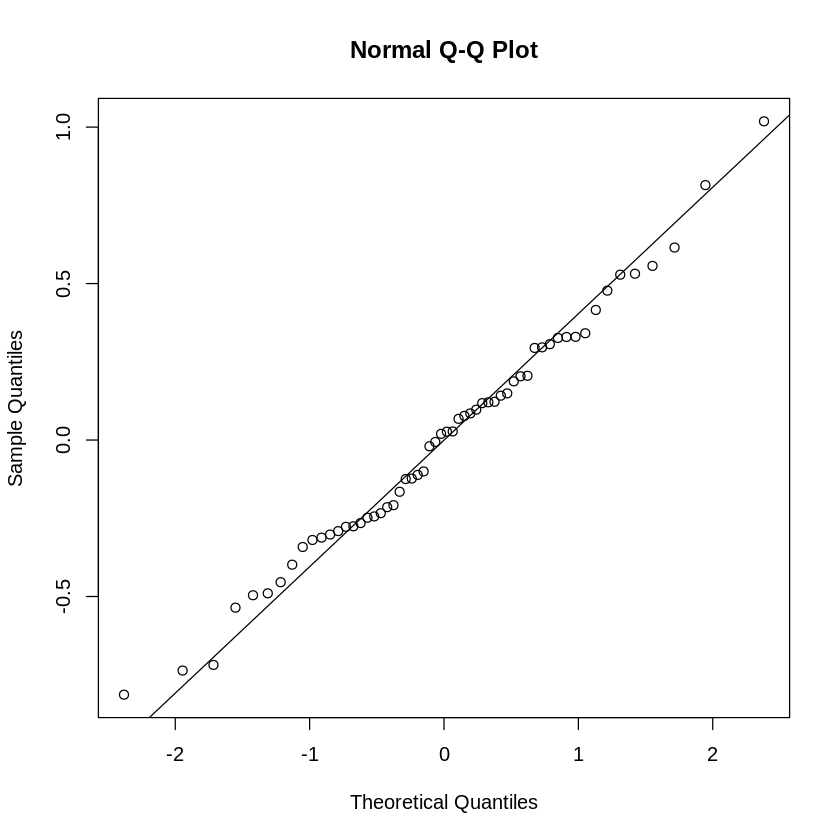

In [ ]:
qqnorm(red_risk_model$residuals)
qqline(red_risk_model$residuals)

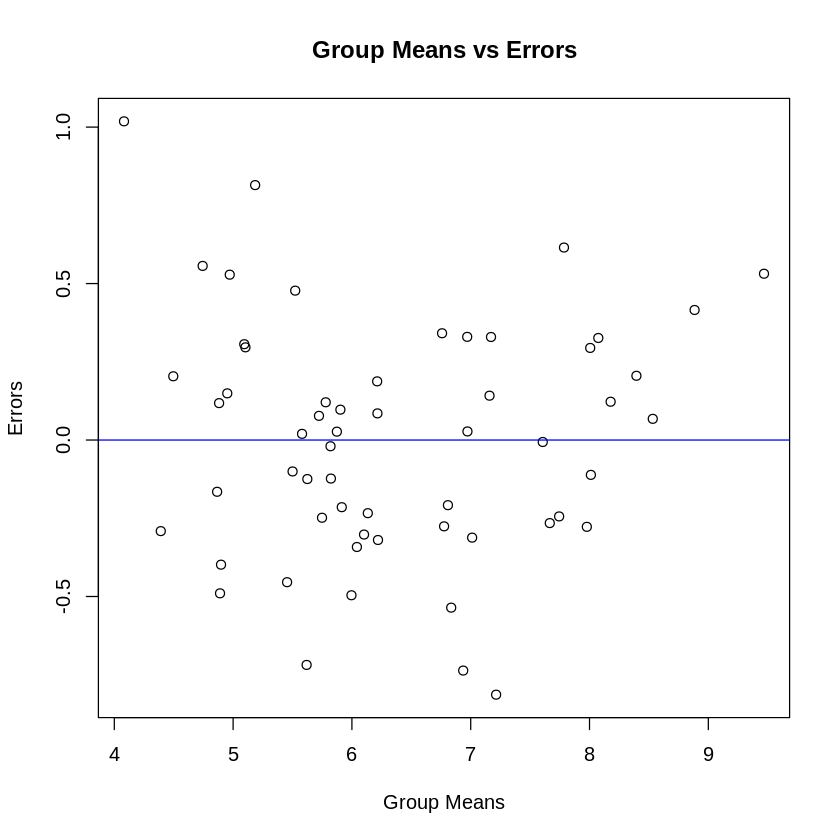

In [ ]:
plot(red_risk_model$fitted.values, red_risk_model$residuals, main = "Group Means vs Errors",
    xlab = "Group Means", ylab = "Errors")
abline(h = 0, col = "blue")

In [ ]:
### HIGH BP
red_risk_model <- lm(pct_high_BP ~ pct_high_chol + pct_current_smoker,
                   data = main_health_data)

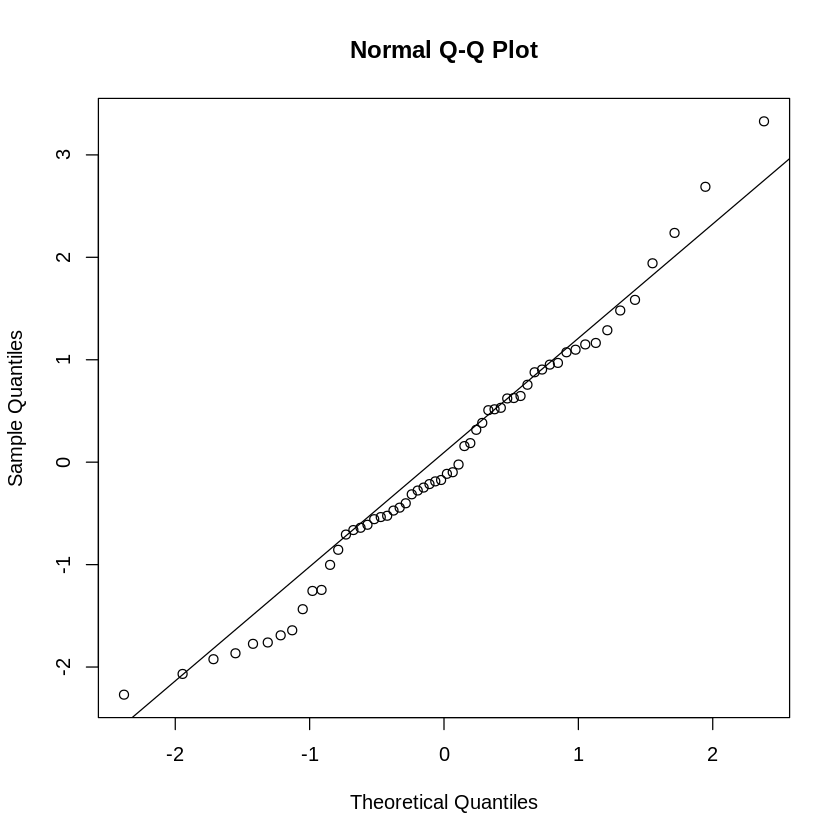

In [ ]:
qqnorm(red_risk_model$residuals)
qqline(red_risk_model$residuals)

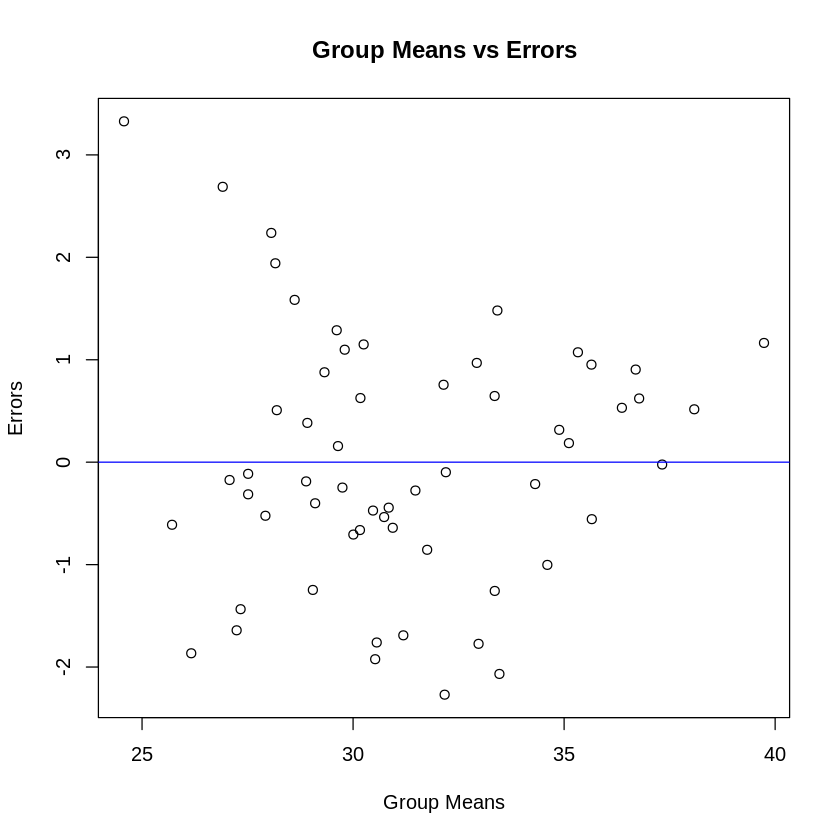

In [ ]:
plot(red_risk_model$fitted.values, red_risk_model$residuals, main = "Group Means vs Errors",
    xlab = "Group Means", ylab = "Errors")
abline(h = 0, col = "blue")

In [ ]:
### STROKE
red_risk_model <- lm(pct_stroke ~ pct_high_chol + pct_current_smoker,
                   data = main_health_data)

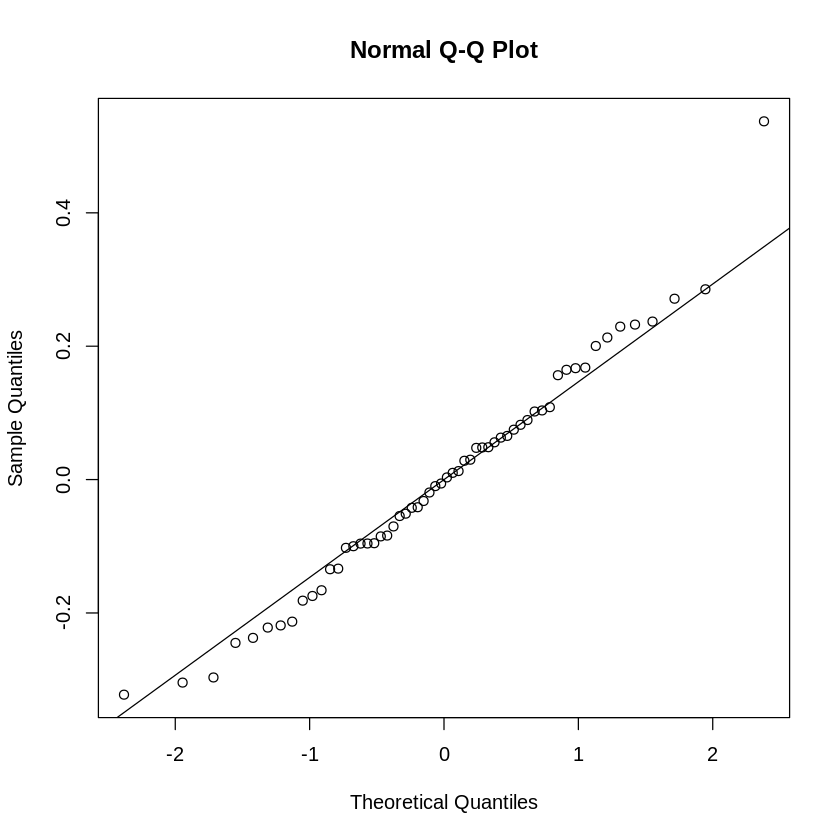

In [ ]:
qqnorm(red_risk_model$residuals)
qqline(red_risk_model$residuals)

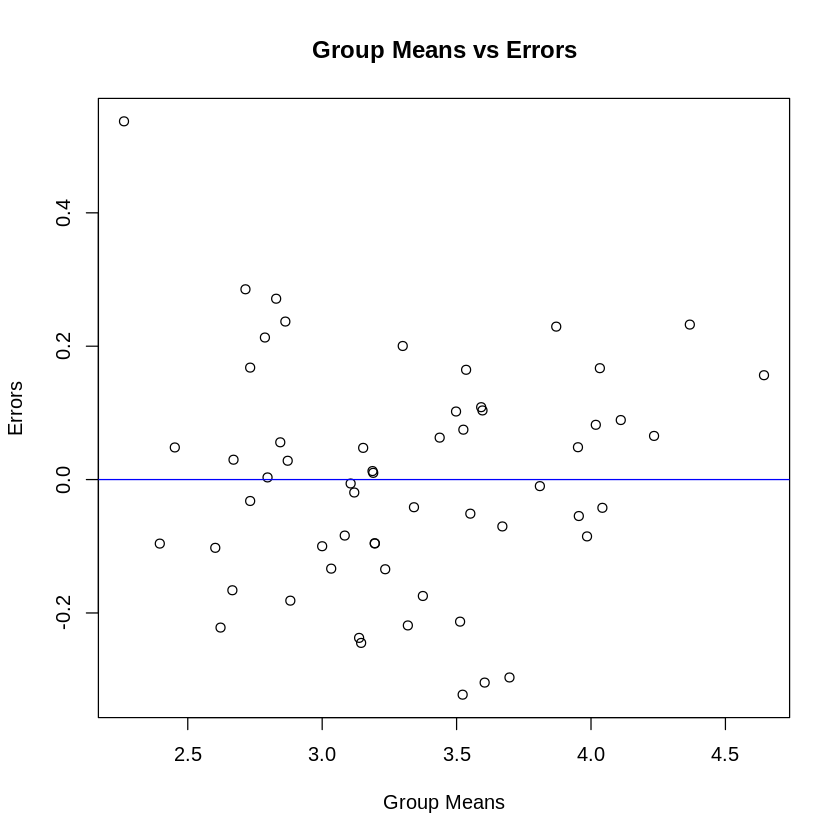

In [ ]:
plot(red_risk_model$fitted.values, red_risk_model$residuals, main = "Group Means vs Errors",
    xlab = "Group Means", ylab = "Errors")
abline(h = 0, col = "blue")

In [ ]:
# High BP
lasso_HBP <- lm(pct_high_BP ~ pct_high_chol + pct_obesity + pct_park_access + urban_rural_status, data = main_health_data)

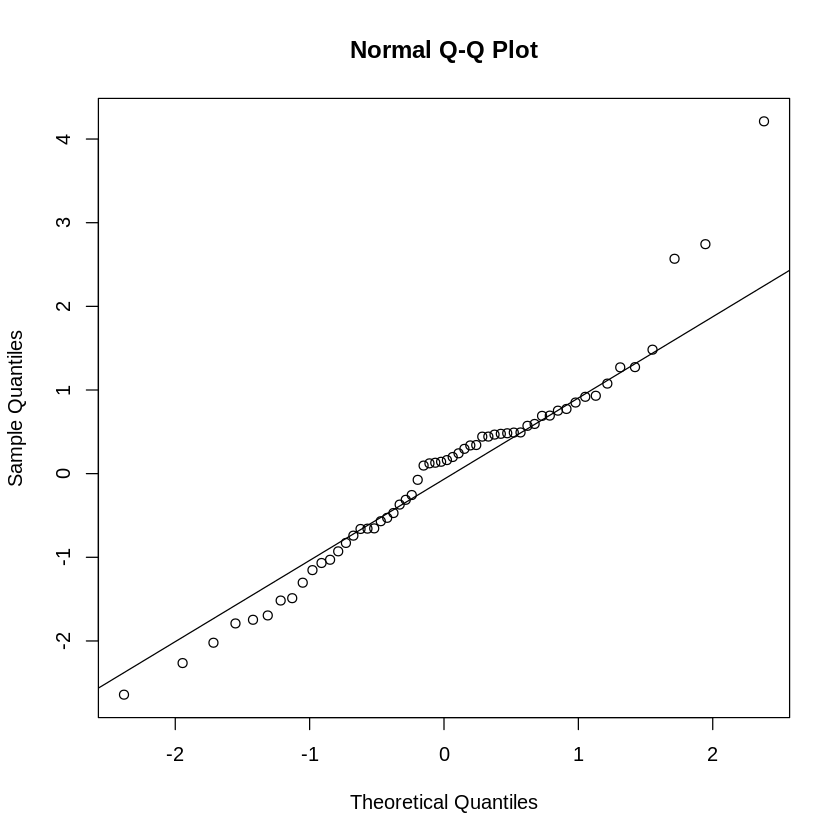

In [ ]:
qqnorm(lasso_HBP$residuals)
qqline(lasso_HBP$residuals)

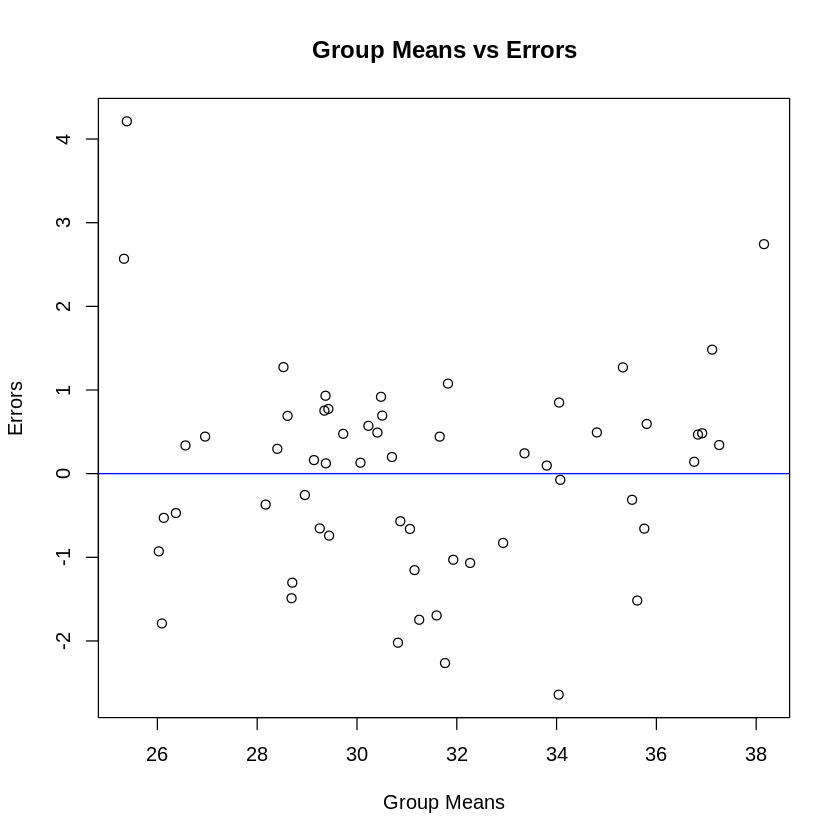

In [ ]:
plot(lasso_HBP$fitted.values, lasso_HBP$residuals, main = "Group Means vs Errors",
    xlab = "Group Means", ylab = "Errors")
abline(h = 0, col = "blue")

In [ ]:
# Stroke
lasso_stroke <- lm(pct_stroke ~ pct_high_chol + pct_obesity + gini
                         + pct_park_access + urban_rural_status + pop_per_primary_dr,
                         data = main_health_data)

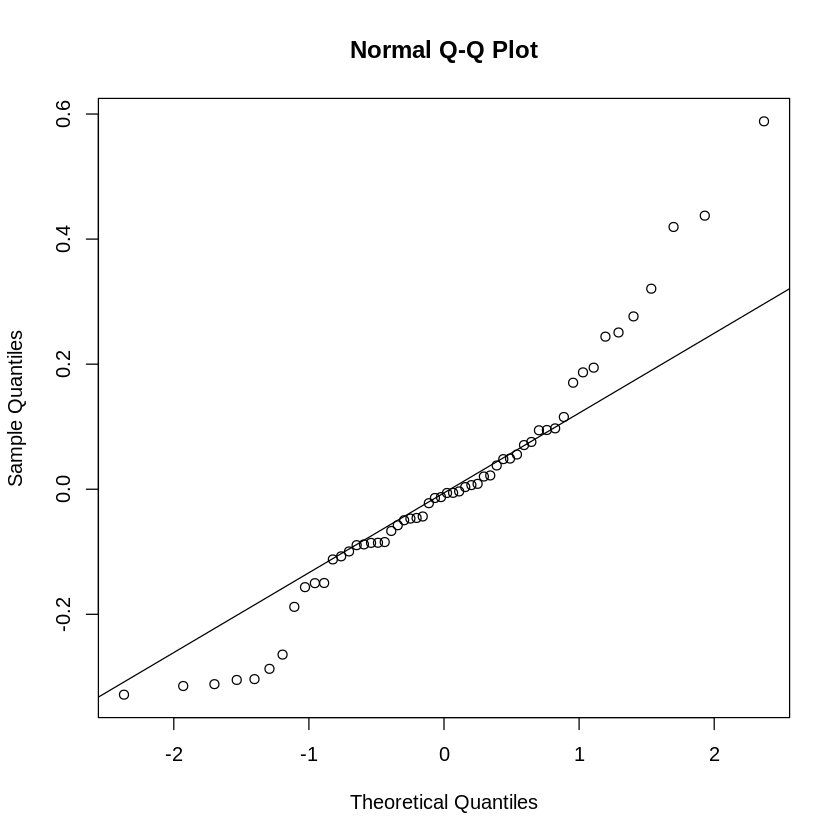

In [ ]:
qqnorm(lasso_stroke$residuals)
qqline(lasso_stroke$residuals)

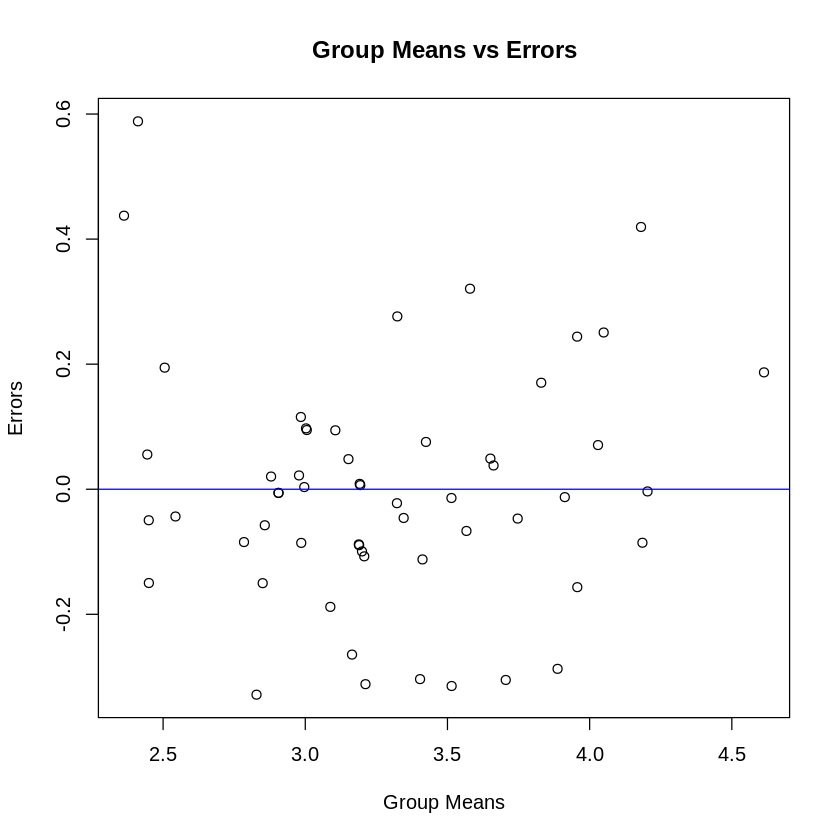

In [ ]:
plot(lasso_stroke$fitted.values, lasso_stroke$residuals, main = "Group Means vs Errors",
    xlab = "Group Means", ylab = "Errors")
abline(h = 0, col = "blue")